<center>     
    <h1>Exploration of the latent space:</h1>
    <h3>Extermes and interpolation from the latent space picture</h3>
    </center>
<center>
    Olivier Pannekoucke <br> 2020/02/28
</center>

<center> <b>Objectifs</b> </center>

 * Metaphorical illustration of Gaussian in large dimension

In [7]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook

In [8]:
latent_dim = 64
ensemble_size = 10000
radius = np.sqrt(latent_dim)

In [9]:
# Pseudo-coordinates for scater plot
def pseudo_sphere(vector):    
    # Compute the norm
    norm = np.linalg.norm(vector)
    
    # Compute the pseudo-sperical coordinate (x,y)
    x,y = norm*vector[:2]/np.linalg.norm(vector[:2])
    
    return x,y,norm
    
    

In [10]:
# Construction of random vector in the latent space
rand_vectors = ( np.random.normal(size=latent_dim) for _ in range(ensemble_size) )
scater_plot = np.asarray([pseudo_sphere(vector) for vector in rand_vectors])
x, y, norms = scater_plot[:,0], scater_plot[:,1], scater_plot[:,2]

In [11]:
def axis_to_data(ax,points_axis):
    axis_to_data = ax.transAxes + ax.transData.inverted()
    points_data = axis_to_data.transform(points_axis)
    return points_data

******************************
Cas où $A^\pm$ correspondent aux extrêmes de léchantillon
******************************


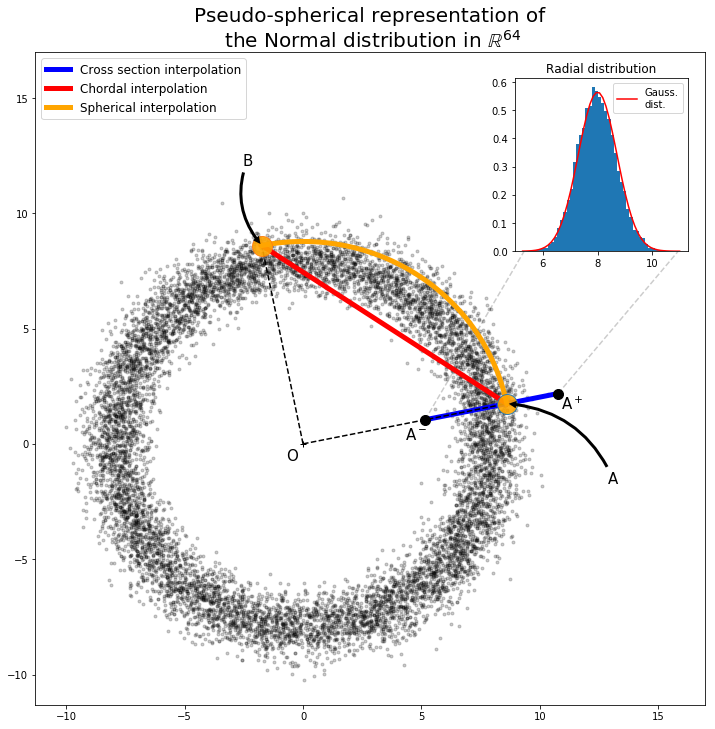

In [14]:
fig, main_ax = plt.subplots(figsize=(12,12))

inset_position = [0.68, 0.65]
inset_width = 0.2
inset_hight = 0.2
inset_box = *inset_position, inset_width, inset_hight
left_inset_ax = fig.add_axes(inset_box)



main_ax.plot(x,y,'k.',alpha=0.2)
ratio = np.sqrt(latent_dim)/np.sqrt(32)
zoom = np.array([-8,12])*ratio
main_ax.set_xlim(*zoom)
main_ax.set_ylim(*zoom)

main_ax.set_title(
    f'Pseudo-spherical representation of\n the Normal distribution in $\mathbb{{R}}^{{{latent_dim}}}$',
    fontsize=20)

# this is another inset axes over the main axes

# Data coordinates for inset
left_inset_point = axis_to_data(main_ax, np.asarray(inset_position)+np.array([0.05,0.045]))
right_inset_point =  axis_to_data(main_ax, np.asarray(inset_position)+np.array([0.28,0.045]))

left_inset_ax.hist(norms, 50, density=True)
x_gauss = np.linspace(norms.min(),norms.max(),50)
var_gauss = 1/2
gauss = 1/np.sqrt(2*np.pi*var_gauss)*np.exp(-0.5*(x_gauss-radius)**2/var_gauss)
left_inset_ax.plot(x_gauss,gauss,'r',label="Gauss.\ndist.")
left_inset_ax.legend()
left_inset_ax.set_title('Radial distribution')
#left_inset_ax.set_xticks([])
#left_inset_ax.set_yticks([])

def plot_line(dot_a,dot_b, *args,**kwargs):
    main_ax.plot([dot_a[0],dot_b[0]],[dot_a[1],dot_b[1]],*args,**kwargs)



# Section
# -------
theta = 0.2
direction = lambda theta:np.array([np.cos(theta),np.sin(theta)])
direction_a = direction(theta)

# Point X-

origin = np.array(2*[0])
s_h, s_v = 1.5,2
hist_min = left_inset_point#np.array([6.5,5.8])
hist_max = right_inset_point#np.array([11.2,5.8])
# Point A+ et A- 

trois_sigma = False
print(30*'*')
if trois_sigma:    
    print('Cas où $A^\pm$ correspondent à $8\pm 3\sigma$')    
    # -- cas $\pm 3\sigma$
    xtrm_min, xtrm_max = (8-3/np.sqrt(2))*direction_a, (8+3/np.sqrt(2))*direction_a
else:
    print('Cas où $A^\pm$ correspondent aux extrêmes de l''échantillon')
    # -- cas des extrêmes de la distribution
    xtrm_min, xtrm_max = x_gauss[0]*direction_a, x_gauss[-1]*direction_a
print(30*'*')

plot_line(xtrm_min, hist_min,"k--",alpha=0.2)
plot_line(xtrm_max,hist_max,"k--",alpha=0.2)
# Section plot
plot_line(xtrm_min,xtrm_max,'b', label='Cross section interpolation',linewidth=5)


# Interpolation
# -------------

direction_b = direction(theta+np.pi/2)
norm_a = norms[0]
norm_b = norms[1]
dot_a = norm_a*direction_a
dot_b = norm_b*direction_b


# Orthogonality
for dot in [dot_a,dot_b]:
    plot_line(origin,dot,'k--')

# Chordal interpolation
plot_line(dot_a, dot_b,'r-', label='Chordal interpolation',linewidth=5)
# Spherical interpolation
n_points = 50
directions = [ direction(th) for th in np.linspace(theta, theta+np.pi/2, n_points) ]
distances = np.linspace(norm_a,norm_b,n_points)
points = [ distance* direction for direction,distance in zip(directions,distances) ]
sph_interpolation = np.asarray( points )
main_ax.plot(sph_interpolation[:,0],sph_interpolation[:,1],color='orange',
                 linewidth=5,label='Spherical interpolation')

main_ax.legend(loc=2,fontsize=12)

# Labels
# ------


style = "simple" # "->"
if style == "simple":
    arrowprops=dict(arrowstyle="simple",
                            fc="0", ec="none",                            
                            connectionstyle="arc3,rad=0.3")
else:
    arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.2")


# Plot points
# -----------

fontsize = 15

main_ax.text(-0.5*ratio,-0.5*ratio,r"$\mathrm{O}$",fontsize=fontsize)
main_ax.text(xtrm_min[0]-0.6*ratio,xtrm_min[1]-0.6*ratio,r"$\mathrm{A}^-$",fontsize=fontsize)
main_ax.text(xtrm_max[0]+0.1*ratio,xtrm_max[1]-0.5*ratio,r"$\mathrm{A}^+$",fontsize=fontsize)


# Plot dots A,B
for dot in [dot_a,dot_b]:
    main_ax.plot(dot[0],dot[1],'o', ms=20, alpha=0.9, mfc='orange')
for dot in [origin]:
    main_ax.plot(dot[0],dot[1],'k+')
for dot in [xtrm_min, xtrm_max]:
    main_ax.plot(dot[0],dot[1],'k.',ms=20)
    
# Plot arrows
# -----------
    
    
main_ax.annotate('$\mathrm{A}$', fontsize=fontsize,
            xy=dot_a, xycoords='data',
            xytext=(100,-80), textcoords='offset pixels',
            arrowprops=arrowprops)
main_ax.annotate('$\mathrm{B}$', fontsize=fontsize,
            xy=dot_b, xycoords='data',
            xytext=(-20, 80), textcoords='offset pixels',
            arrowprops=arrowprops)



#plt.savefig(f"pseudo-spherical-interp-latdim-{latent_dim}.pdf")
plt.show()